In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_curve, auc, RocCurveDisplay
from sklearn import svm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer

import pickle

# SVM with Img Pixel Features

## Load Dataset

In [3]:
with open("preprocessed_data/train_df.pkl", 'rb') as f:
    train_df = pickle.load(f)
    # Shuffling the training data so that it is not in blocks
    train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    X_train = train_df.drop(columns=["label"])
    y_train = np.array(train_df[["label"]]).ravel()

with open("preprocessed_data/test_df.pkl", 'rb') as f:
    test_df = pickle.load(f)
    test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)
    X_test = test_df.drop(columns=["label"])
    y_test = np.array(test_df[["label"]]).ravel()

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [6]:
X_tr

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
7099,0.701961,0.733333,0.749020,0.745098,0.749020,0.749020,0.756863,0.764706,0.768627,0.768627,...,0.709804,0.705882,0.701961,0.705882,0.705882,0.701961,0.709804,0.721569,0.745098,0.752941
2128,0.333333,0.349020,0.356863,0.360784,0.368627,0.376471,0.388235,0.396078,0.400000,0.411765,...,0.325490,0.333333,0.321569,0.329412,0.333333,0.341176,0.333333,0.345098,0.349020,0.345098
4028,0.482353,0.498039,0.482353,0.494118,0.501961,0.509804,0.517647,0.509804,0.541176,0.596078,...,0.345098,0.333333,0.329412,0.337255,0.337255,0.329412,0.329412,0.333333,0.325490,0.333333
921,0.996078,0.996078,0.992157,0.976471,0.949020,0.937255,0.929412,0.913725,0.905882,0.898039,...,0.725490,0.721569,0.717647,0.713725,0.713725,0.713725,0.709804,0.705882,0.701961,0.701961
9047,0.898039,0.901961,0.898039,0.901961,0.898039,0.894118,0.894118,0.890196,0.890196,0.886275,...,0.450980,0.458824,0.450980,0.454902,0.458824,0.466667,0.462745,0.466667,0.474510,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.600000,0.600000,0.600000,0.603922,0.603922,0.607843,0.603922,0.603922,0.607843,0.607843,...,0.568627,0.568627,0.564706,0.560784,0.564706,0.568627,0.560784,0.560784,0.556863,0.552941
7813,0.290196,0.294118,0.286275,0.270588,0.270588,0.274510,0.278431,0.286275,0.286275,0.278431,...,0.478431,0.474510,0.474510,0.462745,0.454902,0.439216,0.427451,0.407843,0.400000,0.415686
905,0.686275,0.537255,0.478431,0.505882,0.521569,0.533333,0.545098,0.576471,0.623529,0.682353,...,0.345098,0.337255,0.333333,0.337255,0.345098,0.313725,0.278431,0.290196,0.262745,0.258824
5192,0.552941,0.611765,0.580392,0.572549,0.568627,0.556863,0.596078,0.580392,0.584314,0.572549,...,0.600000,0.650980,0.619608,0.474510,0.286275,0.145098,0.121569,0.121569,0.117647,0.121569


In [7]:
y_tr

array([2, 1, 1, ..., 2, 2, 3], dtype=int32)

In [9]:
clf = svm.SVC()
clf.fit(X_tr, y_tr)

SVC()

In [9]:
y_val_pred = clf.predict(X_val)

In [13]:
print("Accuracy: "+str(accuracy_score(y_val, y_val_pred)))
print('\n')
print(classification_report(y_val, y_val_pred))
labels_dict = {0: "tops", 1: "bottoms", 2: "bags", 3: "shoes", 4: "others"}

Accuracy: 0.6661538461538462


              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.76      0.74      0.75       528
           2       0.64      0.72      0.68       578
           3       0.74      0.58      0.65       340
           4       0.56      0.64      0.60       447

    accuracy                           0.67      1950
   macro avg       0.74      0.55      0.56      1950
weighted avg       0.68      0.67      0.66      1950



In [10]:
y_pred = clf.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.5836734693877551


              precision    recall  f1-score   support

           0       1.00      0.05      0.10        60
           1       0.68      0.92      0.78        60
           2       0.36      0.74      0.49        35
           3       0.79      0.68      0.73        60
           4       0.49      0.60      0.54        30

    accuracy                           0.58       245
   macro avg       0.66      0.60      0.53       245
weighted avg       0.72      0.58      0.53       245



# SVM (HOG Features)

In [13]:
with open("preprocessed_data/hog_train_Df.pkl", 'rb') as f:
    train_df = pickle.load(f)
    train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    X_train = train_df.drop(columns=["label"])
    y_train = np.array(train_df[["label"]]).ravel()

with open("preprocessed_data/hog_test_df.pkl", 'rb') as f:
    test_df = pickle.load(f)
    test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)
    X_test = test_df.drop(columns=["label"])
    y_test = np.array(test_df[["label"]]).ravel()

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [14]:
X_tr

,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,hog_8,hog_9,...,hog_1754,hog_1755,hog_1756,hog_1757,hog_1758,hog_1759,hog_1760,hog_1761,hog_1762,hog_1763
3023,0.196099,0.028905,0.013391,0.049830,0.144563,0.043829,0.115897,0.251233,0.155341,0.251233,...,0.043139,0.179375,0.076213,0.029800,0.200152,0.332892,0.059942,0.204755,0.000000,0.051572
202,0.130691,0.020874,0.052807,0.010437,0.056011,0.010437,0.039605,0.020874,0.000000,0.088683,...,0.008867,0.015822,0.009831,0.049626,0.085730,0.071806,0.000000,0.000000,0.000000,0.000000
8770,0.085007,0.000000,0.210381,0.000000,0.350198,0.000000,0.150272,0.000000,0.000000,0.191266,...,0.000000,0.158458,0.187229,0.283621,0.283621,0.283621,0.129543,0.026593,0.014016,0.000000
12454,0.058750,0.000000,0.006531,0.004868,0.029250,0.018047,0.090801,0.075463,0.035557,0.070465,...,0.236453,0.306821,0.023287,0.022103,0.021335,0.064425,0.027680,0.053681,0.172211,0.306821
3315,0.005059,0.000000,0.032194,0.028279,0.091058,0.022624,0.014308,0.000000,0.000000,0.442497,...,0.017836,0.067682,0.006306,0.027918,0.018918,0.062042,0.025224,0.023929,0.091120,0.008918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.235363,0.099884,0.033961,0.000000,0.017153,0.015342,0.029110,0.023013,0.021697,0.121382,...,0.062515,0.160488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
905,0.135363,0.000000,0.005991,0.046269,0.086635,0.274770,0.274770,0.014299,0.000000,0.111476,...,0.089152,0.147132,0.050747,0.033645,0.035222,0.185612,0.158457,0.116745,0.023021,0.048564
5192,0.253311,0.059791,0.217689,0.190583,0.287705,0.046814,0.120900,0.033103,0.023407,0.104829,...,0.008631,0.148160,0.023487,0.048767,0.438610,0.438610,0.006103,0.000000,0.017476,0.000000
12172,0.255090,0.000000,0.067905,0.071578,0.240079,0.250522,0.255090,0.255090,0.050613,0.255090,...,0.000000,0.048270,0.107936,0.221861,0.269840,0.205150,0.173081,0.153596,0.000000,0.000000


In [15]:
y_tr

array(['bottom', 'top', 'bag', ..., 'top', 'top', 'other'], dtype=object)

In [16]:
clf = svm.SVC(C=10, gamma="scale", probability=True)
clf.fit(X_tr, y_tr)

SVC(C=10, probability=True)

In [17]:
y_val_pred = clf.predict(X_val)

In [18]:
print("Accuracy: "+str(accuracy_score(y_val, y_val_pred)))
print('\n')
print(classification_report(y_val, y_val_pred))

Accuracy: 0.9278267842822775


              precision    recall  f1-score   support

         bag       0.91      0.92      0.91       604
      bottom       0.96      0.95      0.96       546
       other       0.92      0.93      0.93       527
        shoe       0.93      0.89      0.91       295
         top       0.93      0.93      0.93       522

    accuracy                           0.93      2494
   macro avg       0.93      0.93      0.93      2494
weighted avg       0.93      0.93      0.93      2494



In [19]:
y_pred = clf.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.889795918367347


              precision    recall  f1-score   support

         bag       0.73      0.91      0.81        35
      bottom       0.95      0.95      0.95        60
       other       0.80      0.67      0.73        30
        shoe       0.93      0.92      0.92        60
         top       0.95      0.90      0.92        60

    accuracy                           0.89       245
   macro avg       0.87      0.87      0.87       245
weighted avg       0.89      0.89      0.89       245



### Hyperparamter Tuning

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': ["auto", "scale"], 
              'kernel': ['rbf'], 
             }  
  
grid = RandomizedSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

### Plotting ROC Curve and AUC for Each Category

In [20]:
y_score = clf.predict_proba(X_test)


In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

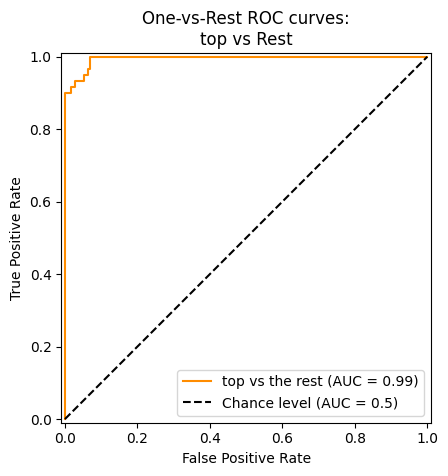

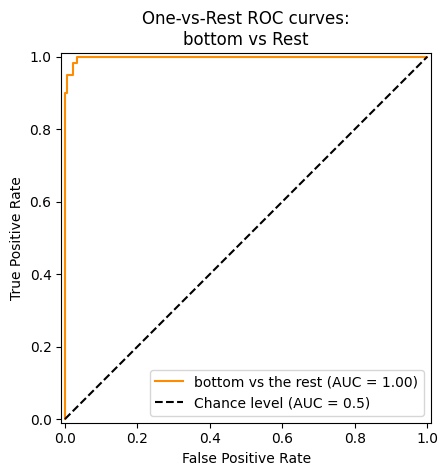

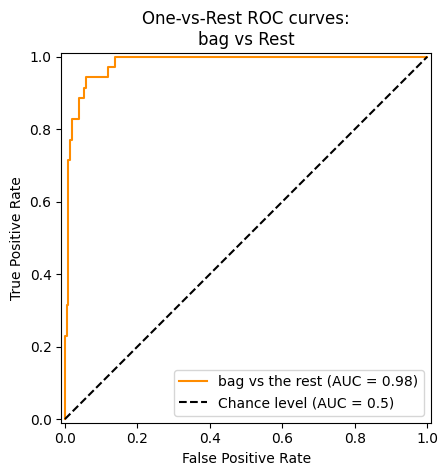

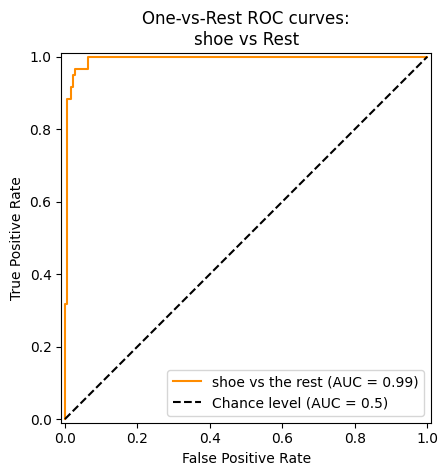

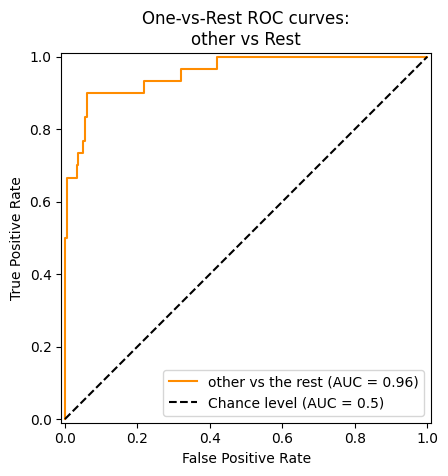

In [26]:
categories = ["top", "bottom", "bag", "shoe", "other"]
for cat in categories:
    class_id = np.flatnonzero(label_binarizer.classes_ == cat)[0]
    display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{cat} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"One-vs-Rest ROC curves:\n{cat} vs Rest",
    )
